In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: cleaned_all_phones.csv  


In [105]:
df = pd.read_csv("/content/cleaned_all_phones.csv")

In [85]:
df.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)'],
      dtype='object')

In [86]:
df.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [106]:
df = df.drop(['brand','phone_name','video_1080p', 'video_4K', 'video_8K', 'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps', 'video_480fps', 'video_960fps'], axis=1)

In [107]:
df = df.replace({'False':0, "True":1})

In [108]:
df.head()

,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),storage(GB),video_720p,price(USD)
0,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,16,True,120.0
1,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,16,False,100.0
2,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,16,False,420.0
3,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,32,True,150.0
4,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,32,True,420.0


In [109]:
df["price(USD)"]

0       120.000
1       100.000
2       420.000
3       150.000
4       420.000
         ...   
1507    170.000
1508    182.880
1509    380.000
1510    470.000
1511    287.988
Name: price(USD), Length: 1512, dtype: float64

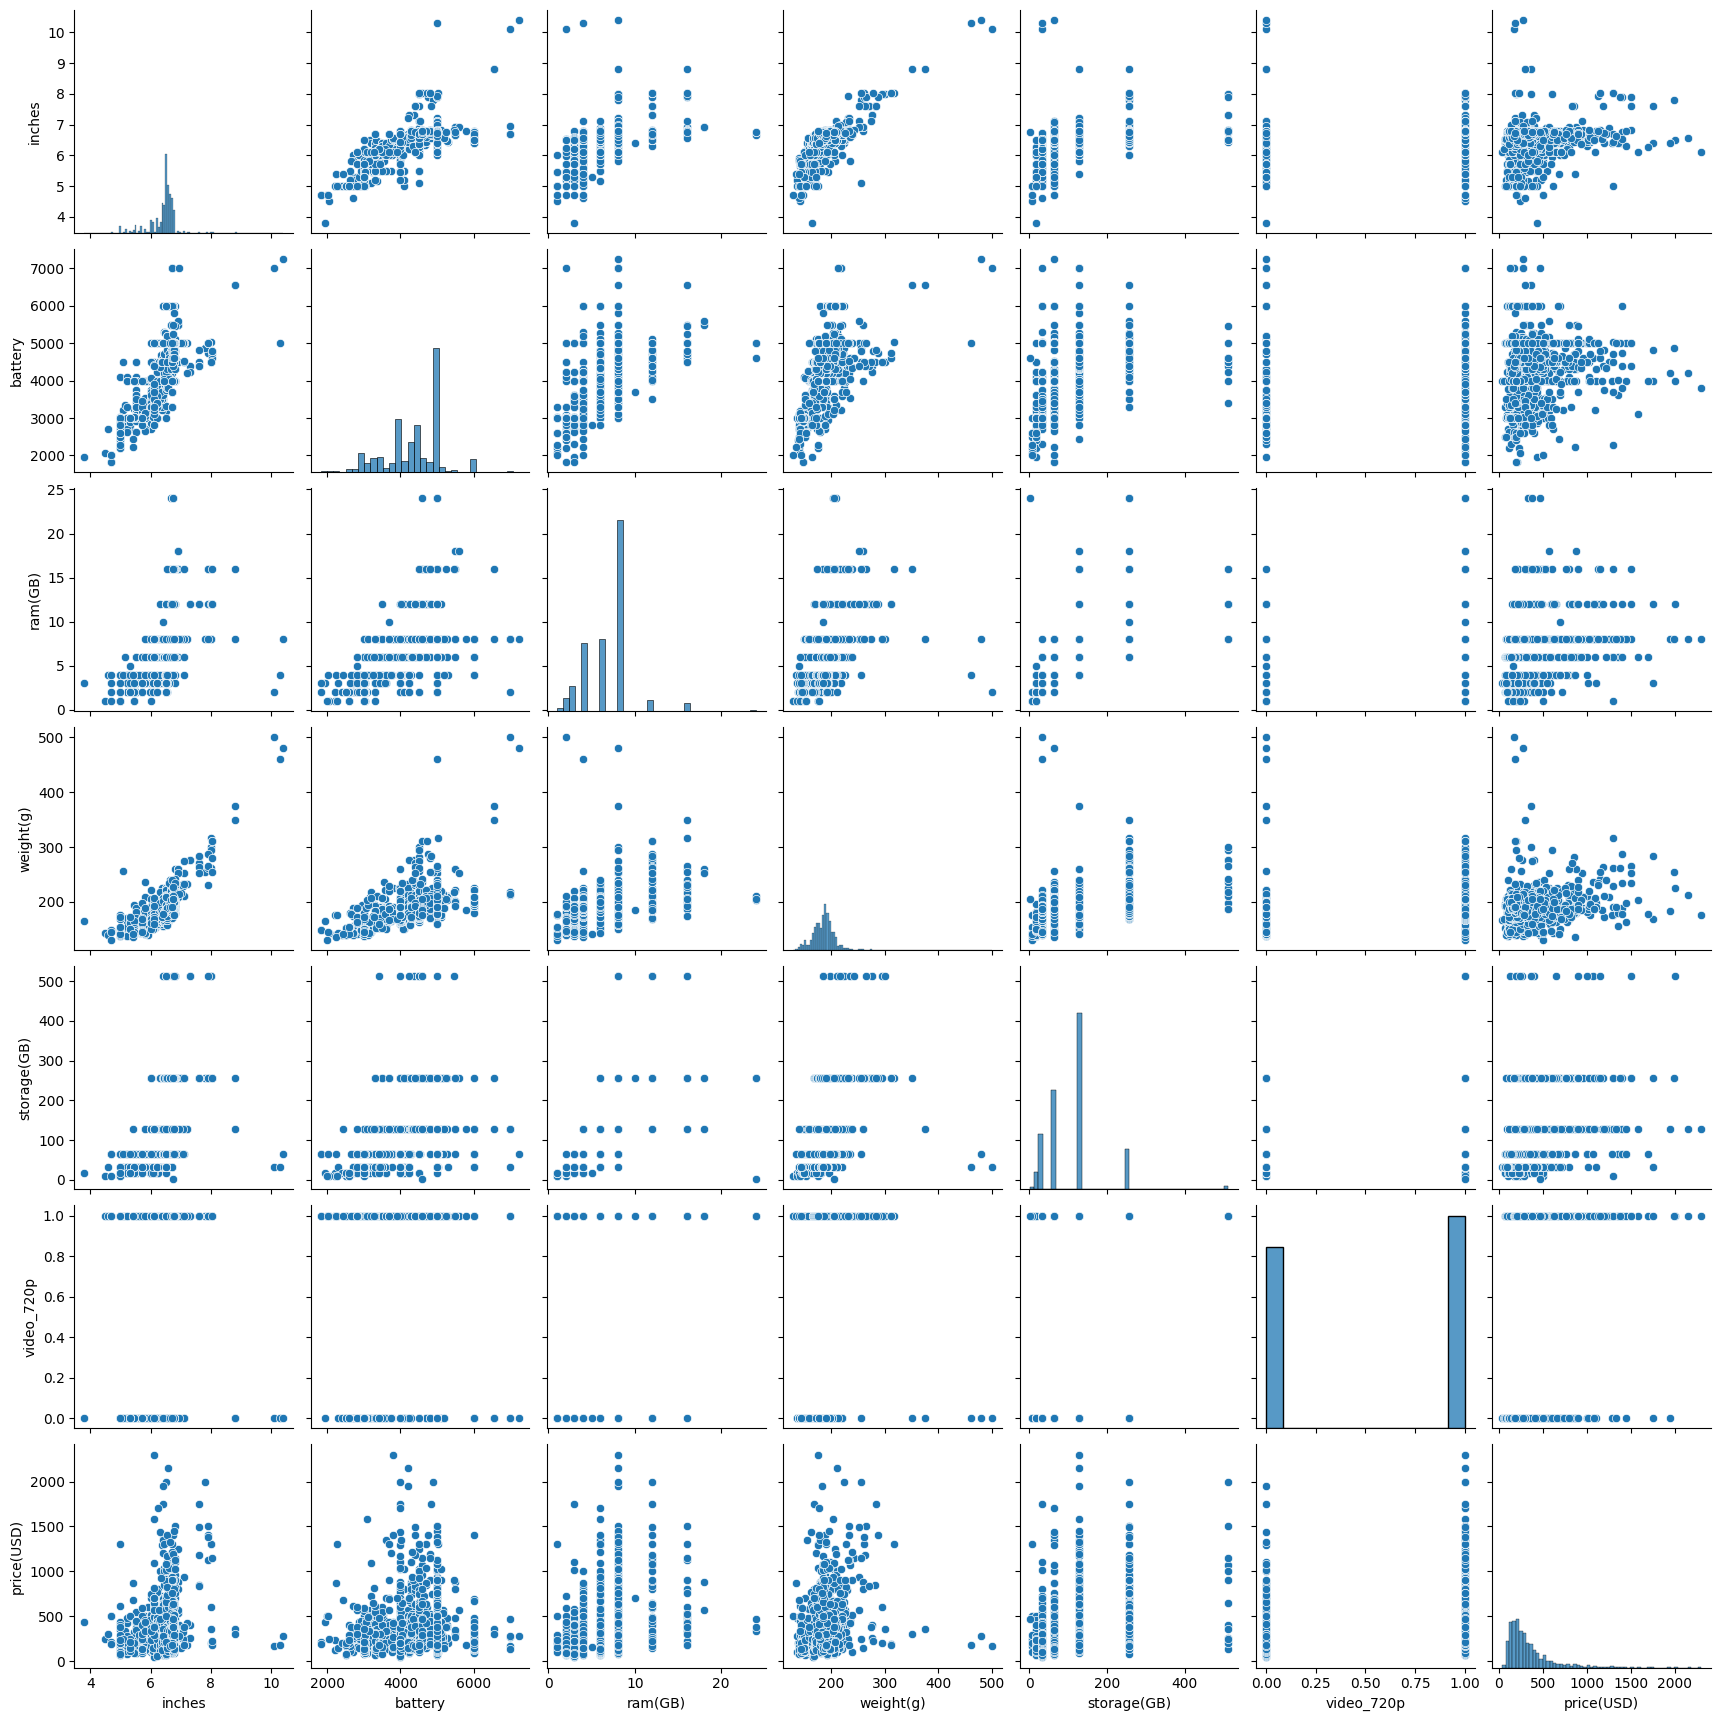

In [91]:
sns.pairplot(data=df)
plt.show()

In [179]:
X = df.drop(['price(USD)'], axis =1)
Y = df['price(USD)']

<Axes: xlabel='inches', ylabel='battery'>

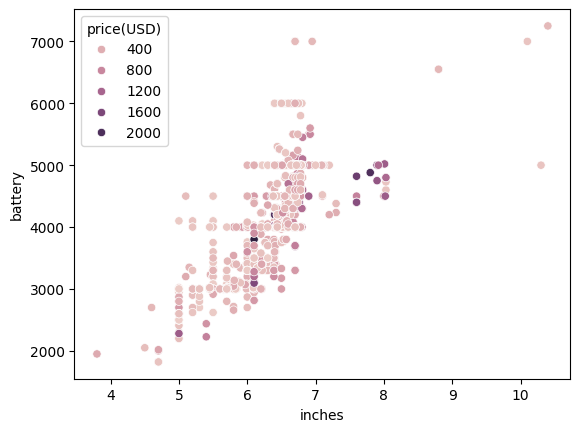

In [112]:
sns.scatterplot(data=df, x='inches', y='battery', hue='price(USD)')

<Axes: xlabel='weight(g)', ylabel='inches'>

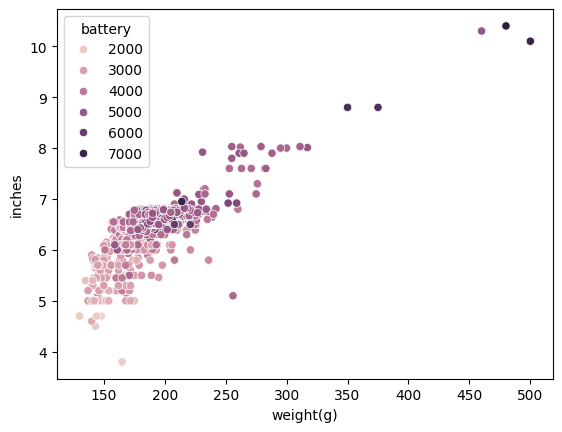

In [113]:
sns.scatterplot(data=df, x='weight(g)', y='inches', hue='battery')

In [114]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X , Y,  test_size=0.1, random_state=3)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   os                 1512 non-null   object 
 1   inches             1512 non-null   float64
 2   resolution         1512 non-null   object 
 3   battery            1512 non-null   int64  
 4   battery_type       1512 non-null   object 
 5   ram(GB)            1512 non-null   int64  
 6   announcement_date  1512 non-null   object 
 7   weight(g)          1512 non-null   float64
 8   storage(GB)        1512 non-null   int64  
 9   video_720p         1512 non-null   bool   
 10  price(USD)         1512 non-null   float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 119.7+ KB


In [172]:
df.os

0       Android 5.1
1       Android 7.0
2       Android 7.0
3       Android 6.0
4       Android 7.0
           ...     
1507     Android 13
1508     Android 13
1509     Android 13
1510     Android 13
1511     Android 13
Name: os, Length: 1512, dtype: object

In [183]:
nums=['inches', 'battery', 'ram(GB)', 'weight(g)', 'storage(GB)']
cat = ['resolution', 'battery_type']


In [184]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [185]:
num_pipeline = Pipeline([
    ("sc", StandardScaler())
])

cats_pipeline = Pipeline([
    ('ohe', OneHotEncoder()),

])

pipeline = ColumnTransformer([
    ('nums', num_pipeline, nums),
    ('cats', cats_pipeline, cat)
])


In [191]:
X_train = pipeline.fit_transform(X_train)

In [187]:
from sklearn import svm

In [177]:
classifier = svm.SVC(kernel='linear')

In [192]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [193]:
LR.fit(X_train, Y_train)

LinearRegression()